# Churn Prediction Analysis Part 2

In [118]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization

In [119]:
telcom = pd.read_csv("clean_df.csv")
pd.set_option("display.max_columns", None)

In [120]:
telcom.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [121]:
telcom = telcom.drop('Unnamed: 0', axis = 1)

In [122]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [123]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [124]:
multi_cols

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'tenure_group']

In [125]:
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols)

In [126]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,0,1,1,1,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
7028,2234-XADUH,0,0,1,1,72,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
7029,4801-JZAZL,0,0,1,1,11,0,1,0,0,0,0,0,1,29.60,346.45,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
7030,8361-LTMKD,1,1,1,0,4,1,0,0,0,0,0,0,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0


In [127]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [128]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [129]:
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

# What is the purpose of the above code?

**Answer** The steps that are done in the above code are:
1. The data is loaded and the target variable is removed.
2. All the colums are segrigated in to number columns, binary colums and multi columns(strung data with more than 2 values as their outcome.)
3. All the binary columns are converted into numeric columns and all the multi columns are converted into numerical binary data through one-hot encoding.
4. The numeric data is standardized using standard scalar. Then the only numeric colums are removved and replace withthe standardized data.

In [130]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457


In [131]:
summary = telcom.describe().transpose()
summary.T

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03
mean,0.504693,0.162400,0.482509,0.298493,0.903299,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,0.265785,0.481371,0.096701,0.421928,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100,0.309300,0.14562,0.226678,0.118316,0.200085,-1.214741e-16,9.652878e-17,-1.172113e-16
std,0.500014,0.368844,0.499729,0.457629,0.295571,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,0.441782,0.499688,0.295571,0.493902,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637,0.462238,0.35275,0.418712,0.323005,0.400092,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,9.199259e-01,8.331482e-01,6.668271e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.612573e+00,1.793381e+00,2.824261e+00


# Variable Summary

In [132]:
# To make it look nice we can do some additional stuff if needed
summary = (telcom[[i for i in telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [133]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [134]:
#convert to array
corr_array  = np.array(correlation)

In [135]:
correlation

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,-0.011902,-0.008545,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199,-0.001050,-0.000649,-0.010516,-0.004319,0.016279,0.005285,-0.013779,0.000048
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,0.156258,0.150541,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,-0.027713,0.001860,0.020383,0.014186,-0.002407,0.015683,0.219874,0.102411
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,-0.013957,-0.149982,-0.130028,-0.018397,0.142561,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,-0.305061,-0.048481,0.028468,0.105341,0.280353,0.381912,0.097825,0.319072
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,-0.110131,-0.163128,0.023388,0.001078,-0.024307,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448,-0.145379,-0.001459,0.024645,0.031419,0.118090,0.163386,-0.112343,0.064653
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.016696,0.011691,0.315218,-1.000000,0.279530,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,-0.006950,0.012307,-0.014778,-0.009750,0.020516,0.007877,0.248033,0.113008
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,-0.091676,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,-0.004051,-0.171270,-0.151678,0.091676,0.098592,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918,-0.242409,-0.055662,0.007695,0.071663,0.263228,0.328297,0.296447,0.412619
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.127056,-0.082307,-0.230724,0.052133,0.202228,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075,-0.267366,-0.084081,0.023085,0.099192,0.278788,0.361138,0.441529,0.510100
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,0.104079,-0.066193,-0.240847,0.070076,0.201733,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325,-0.273920,-0.077332,0.044972,0.076854,0.275537,0.361520,0.482607,0.522881
TechSupport,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.354458,0.293705,0.332850,1.000000,0.277549,0.280155,0.037536,-0.164716,-0.155534,0.095138,0.100421,0.312183,-0.020299,-0.335695,-0.285491,0.096258,0.240924,0.100472,0.117024,-0.114807,-0.084631,-0.238628,-0.072019,0.022137,0.062710,0.265396,0.325288,0.338301,0.432868
StreamingTV,-0.007124,0.105445,0.124483,-0.016499,-0.021383,0.175514,0.281601,0.389924,0.277549,1.000000,0.533380,0.224241,0.063254,-0.267466,0.021383,0.257804,0.014973,0.329744,-0.414951,-0.112550,0.061930,0.072124,0.046121,0.040010,0.144747,-0.247712,-0.220761,-0.050234,0.028829,0.087969,0.198150,0.280264,0.629668,0.515709


In [136]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

# Q. What do you observe?

**Answer**: In this plot we can see that there is a strong corelation between the tenure and total price as well as the monthly payment as well as the total price. There is also a corelation with the number of services taken and the monthly cost that a customer has.

# Model Building (We will build Decision Tree and Logistics Regression models)

### Separate the features from the class label and split the dataset into training and testing sets

In [137]:
# Import all the modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics

In [138]:
#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)

# Q. What is the purpose of random_state parameter?

**Answer**: The random_state parameter is used for initializing the internal random number generator. By dont this when the code is run again the number generator ensure the same numbers are generated again. Thus, ensuring that an experiment or a model could be run again with the same randomly generated numbers.

In [139]:
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]

In [140]:
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure_group_Tenure_0-12',
 'tenure_group_Tenure_12-24',
 'tenure_group_Tenure_24-48',
 'tenure_group_Tenure_48-60',
 'tenure_group_Tenure_gt_60',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

# Logistic Regression

In [141]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [142]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [143]:
classifier.coef_

array([[-0.08956523,  0.2155802 ,  0.00261881, -0.13203242, -0.17862605,
        -0.42725045, -0.18892667, -0.00870742, -0.3112667 ,  0.17963567,
         0.25754609,  0.367999  , -0.27665409,  0.18276858,  0.09802804,
        -0.04404561,  0.65238953, -0.60420139,  0.72158819,  0.02814405,
        -0.74558972, -0.00908784, -0.13951925,  0.22585762, -0.07310801,
        -0.2514493 , -0.65053012, -0.18548984,  0.5485507 ,  0.54306109,
        -1.37383639,  0.18818296,  0.24841288]])

In [144]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.8020477815699659
0.6888297872340425
0.5285714285714286
0.5981524249422633


# Q. What do the scores mean? Is this a good model fit based on the scores. Make sure you print all the scores.

**Answer**: The scores mean:

Accuracy score: Accuracy score is the total number of preditions which the model predicted correctly against all the predictions made by model. This could be written as (True positive + True Negative)/(True positive + True Negative + Flase positive + False Negative)

Precition score: It is the score of number of correctly predicted positive score to the total number of positive score. This shows us how often the model predics the negatve scoere as positive. This could be written as True positive / (True positive + Flase positive)

Recall score: This is the score of number of correctly predicted positive score to the total number of possible positive score. This is to iidentify the number of positive scores that the moedl is predicting correctly and incorrectly. This could be written as True positive / (True positive + Flase negative)

F1 score: F1 score is a measure of a models accuracy by combining the recall and the precition score.

Thiis model is not a good model as it has low precition, recall and f1 scores. Thouh the accuracy score is not bad overall this model is poor.

Test Data Accuracy: 0.8020


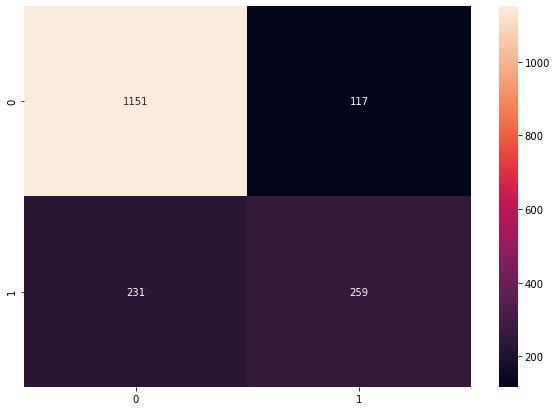

In [145]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

# Decison Tree

In [146]:
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

In [147]:
# Predicting test set
y_pred = model_tree.predict(X_test)

In [148]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.732650739476678
0.521551724137931
0.49387755102040815
0.5073375262054507


# Q. What do the scores mean? Is this a good model fit based on the scores. Make sure you print all the scores.

**Answer**:  The scores mean that the model is not a good one as it has low precition, recall and f1 scores. Furthermore, the f1 and the recall score are just about 50%. The accuracy score is also poor as it only has an accuracy of about 73%.The scores that the model got are:

Accuracy score: 0.732650739476678 means the model predits the true values about 73% of the time.

Precition score: 0.521551724137931 means that only about 52% of the potive predictions made by the model are true.

Recall Score: 0.49387755102040815 mean that only about 50% of all the positive values are predicted right

F1 score: 0.5073375262054507 means that the model only has about a 50% accuracy level using this model.

Test Data Accuracy: 0.7327


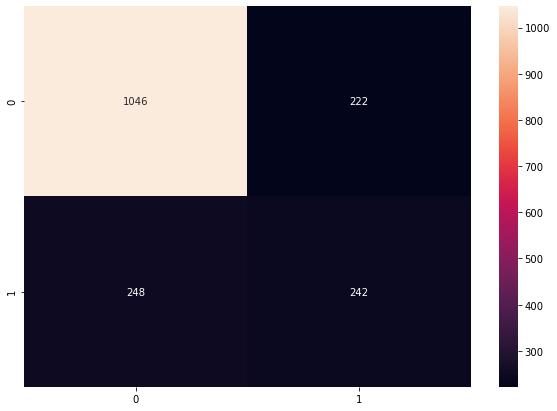

In [149]:
# Build Confusion Matrix

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

# Q Which model performs better? (Hint: compare the metrics)

**Answer**: Model 1 is better as it has better Accuracy score, Precition score, Recall score as well as f1 score. So by comparing all the metrics we can see that the 1st model is the better model.

# K- fold Cross Validation

### Q. What is K-fold cross validation?

**Answer**: K-fold cross validation is an evaluation tool which checks the ability of a model to work on new data. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

In [150]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y =Y_train, cv =10)

In [151]:
# Check for accuracies
accuracies

array([0.80681818, 0.78219697, 0.82386364, 0.8219697 , 0.83301708,
       0.79316888, 0.78937381, 0.80075901, 0.80265655, 0.78937381])

# Q. What do accuracies tell?

**Answer**: This tells us there is no overfitting on the training data set. Thu, thi also means that the model will perform fairly on the testindata set.

In [152]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], 
                                                                              axis = 1)

,features,Coef
0,gender,-0.089565
1,SeniorCitizen,0.215580
2,Partner,0.002619
3,Dependents,-0.132032
4,PhoneService,-0.178626
5,OnlineSecurity,-0.427250
6,OnlineBackup,-0.188927
7,DeviceProtection,-0.008707
8,TechSupport,-0.311267
9,StreamingTV,0.179636


In [153]:
df=pd.concat([pd.DataFrame(X_train.columns, columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), 
                                                                              columns =["Coef"])], 
                                                                              axis = 1)

In [154]:
df = df.sort_values('Coef', ascending=False)
df.head()

,features,Coef
18,Contract_Month-to-month,0.721588
16,InternetService_Fiber optic,0.652390
28,tenure_group_Tenure_48-60,0.548551
29,tenure_group_Tenure_gt_60,0.543061
11,PaperlessBilling,0.367999


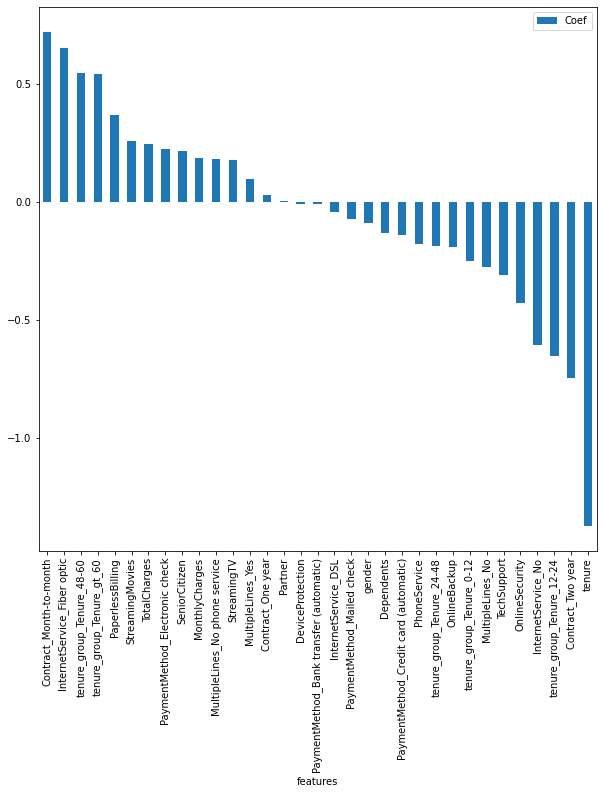

In [155]:
ax = df.plot.bar(x='features', y='Coef', figsize=(10,10))

# What do you observe?

**Answer**: This shows us the longes the tenure the less likely it is fir the customer to churn. on the other hand if a customer has a lower contract they are more likely to churn. Furthermore the more services the customer uses the more likely he is to stay with the company and not churn The vice-versa is also true as people who take less sevices are more likely to churn.

# Feature Seclection/Feature Engineering

In [156]:
from sklearn.feature_selection import RFE 
classifier = LogisticRegression()
rfe = RFE(classifier, 10)
rfe = rfe.fit(X_train, Y_train)

In [157]:
print(rfe.support_)

[False False False False False  True False False False False  True False
  True False False False  True  True  True False  True False False False
 False False False False  True  True  True False False]


In [158]:
X_train.columns[rfe.support_]

Index(['OnlineSecurity', 'StreamingMovies', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'tenure'],
      dtype='object')

In [159]:
rfe.ranking_

array([18,  7, 24, 14, 15,  1, 11, 23,  5,  6,  1,  3,  1, 12, 16, 20,  1,
        1,  1, 21,  1, 22, 17,  4, 19,  8,  2,  9,  1,  1,  1, 13, 10])

In [160]:
# Build the model again after Feature Selection
classifier1 = LogisticRegression(random_state = 2)
classifier1.fit(X_train[X_train.columns[rfe.support_]], Y_train)

y_pred = classifier1.predict(X_test[X_test.columns[rfe.support_]])

In [161]:
#Evaluating the Results
cm1 = confusion_matrix(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.7901023890784983
0.6657534246575343
0.4959183673469388
0.568421052631579


Test Data Accuracy: 0.7901


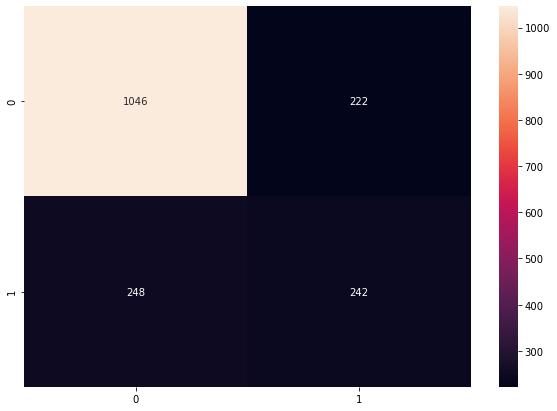

In [162]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

# Q. Has the model improved after feature selection?

**Answer**: 
1. Comered to model 1: Model 1 is better than after feature selection on all parameters. This shows the comparition between the logistic regression and shows that no feature selection was required as the accuracy reduses with the feature selection
1. Compared to model 2: On the other hand there is an improvement on the 2nd model on all measuews but this is a comparition between 2 diffrent models so it does not tell us as much as comparing it with the first model.

# Q. Build a bar plot similar to the one with all the features

In [163]:
df1=pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns =["feature2"]), pd.DataFrame(np.transpose(classifier1.coef_), columns =["Coef1"])], axis = 1)
ax1 = df1.plot.bar(x='feature2', y='Coef1', figsize=(10,10))

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

# Q. Share your observations. Do you find them different?

**Answer**: This new plot shows only the feature which have at least 0.5 corelation to the churn rate. Thus there are a lot fewer feature in this bar plot.

In [ ]:
final_results = pd.concat([Y_test, telcom.customerID], axis =1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['customerID', 'Churn', 'predicted_churn']].reset_index(drop = True)
print(final_results)

# Q. Provide recommendations based on the feature selection. What should company target for to reduce churn?

**Answer**: My recomendation will be to try and convince customers to take longer tern contracts as well as try to upsell and cross-sell products to the customers so that they take as many products from your company as possible. This will reduce the overall churn rate for the company.

# Practice Q. Can you Add SVM model to this dataset and perform the same steps and check test data accuracy?

In [164]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)
print((accuracy_score(Y_test, y_pred)))

0.7957906712172924
